## 🔍 Explicabilidad de Modelos con SHAP

**SHAP (SHapley Additive exPlanations)** es un enfoque basado en teoría de juegos para explicar la predicción de cualquier modelo de machine learning. Utiliza los valores de Shapley (de la teoría cooperativa de juegos) para asignar a cada feature una contribución justa en la predicción del modelo.

### 🧠 ¿Por qué usar SHAP?

En modelos complejos (como Random Forests, XGBoost o redes neuronales), no es trivial entender por qué una predicción se dio. SHAP permite:

- Estimar **qué tan importante** es cada feature para la predicción.
- Visualizar cómo **cambia la predicción** cuando cambia un feature.
- Comparar explicaciones **globales (todo el dataset)** vs. **locales (una predicción puntual)**.

### 🔧 ¿Cómo funciona?

SHAP construye una predicción como la suma de contribuciones de cada feature respecto al valor esperado (baseline del modelo):

$$\hat{y}(x) = \mathbb{E}[\hat{y}] + \phi_1 + \phi_2 + \ldots + \phi_n$$

donde:

- $\hat{y}(x)$: predicción del modelo para una instancia.
- $E[\hat{y}]$: valor esperado del modelo (promedio de predicciones).
- $\phi_i$: valor SHAP del feature $i$, su contribución al resultado.


### 📊 Gráficos típicos

- **Bar Plot**: importancia media de cada feature (global).
- **Beeswarm Plot**: cómo varían las contribuciones por instancia (global).
- **Waterfall Plot**: cómo se construye la predicción de un caso puntual (local).

### ⚠️ Nota para clasificación

En tareas de clasificación, SHAP devuelve una matriz 3D con explicaciones para cada clase. Para graficar, es necesario seleccionar una clase en particular, por ejemplo:

```python
shap_values_class1 = shap_values[:, :, 1]  # Clase positiva


## 📝 Explicación del código SHAP

1. **Carga de librerías y datos**
   - Se importan las librerías necesarias: `shap`, `pandas`, `matplotlib`, y módulos de `sklearn`.
   - Se carga el dataset de cáncer de mama y se convierte en un DataFrame de pandas.

2. **División de datos y entrenamiento**
   - Se divide el dataset en entrenamiento y test (`train_test_split`).
   - Se entrena un modelo Random Forest con los datos de entrenamiento.

3. **Cálculo de valores SHAP**
   - Se crea un objeto `Explainer` de SHAP usando el modelo entrenado y los datos de entrenamiento.
   - Se calculan los valores SHAP para el set de test.
   - Como es un problema de clasificación, se seleccionan los valores SHAP para la clase 1 (maligno).

4. **Gráficos globales**
   - `shap.plots.beeswarm`: muestra la distribución de las contribuciones de cada feature para todas las instancias.
   - `shap.plots.bar`: muestra la importancia media de cada feature.

5. **Interpretabilidad local (individual)**
   - Se recorre un ciclo para los primeros 5 ejemplos del set de test.
   - Para cada ejemplo, se imprime la clase real y se muestra un gráfico **waterfall** que explica cómo cada feature contribuyó a la predicción de ese caso puntual.

**Resumen:**  
El código entrena un modelo de clasificación, calcula explicaciones SHAP globales y locales, y visualiza la importancia y el impacto de cada feature tanto a nivel general como para ejemplos individuales. Esto ayuda a entender cómo y por qué el modelo toma sus decisiones.

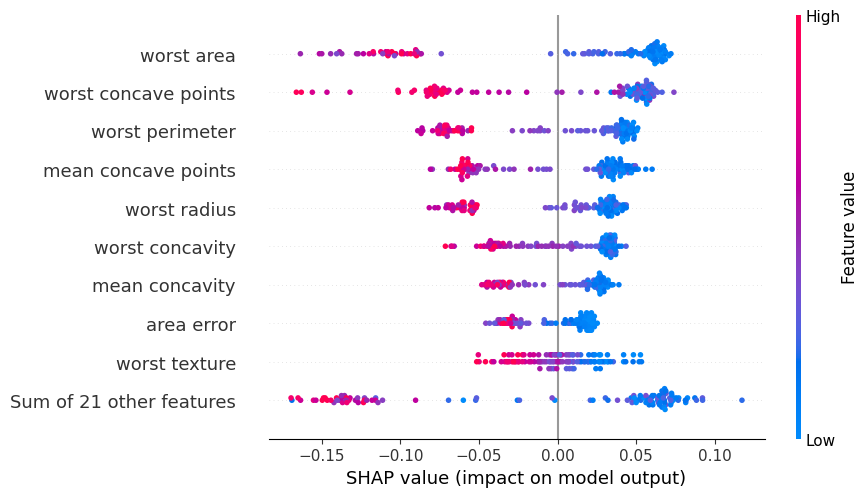

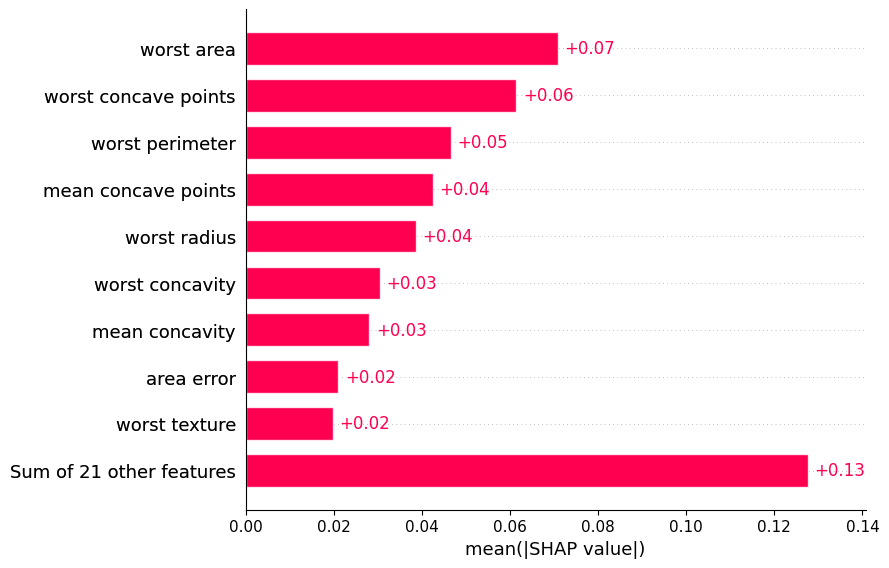

Ejemplo 0 - Clase real: 1


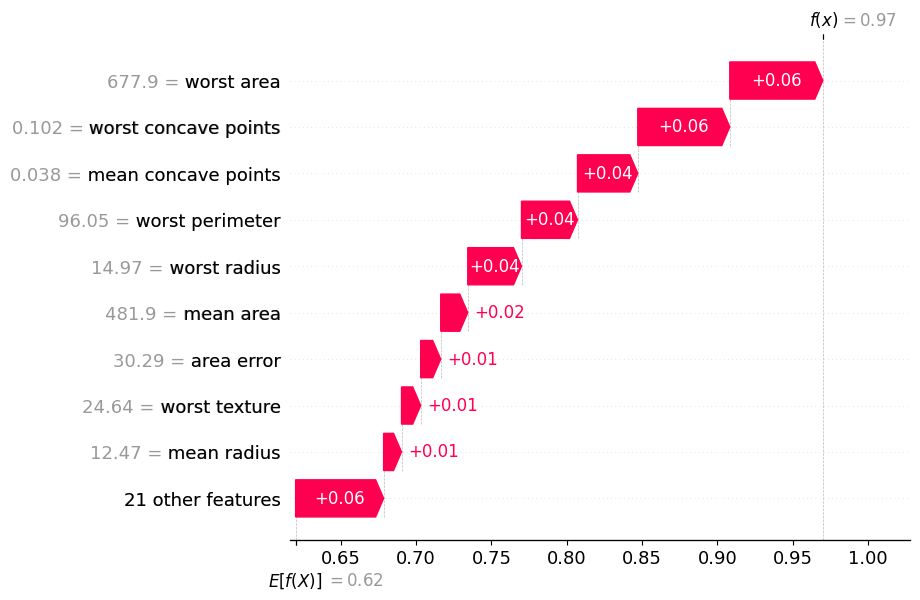

Ejemplo 1 - Clase real: 0


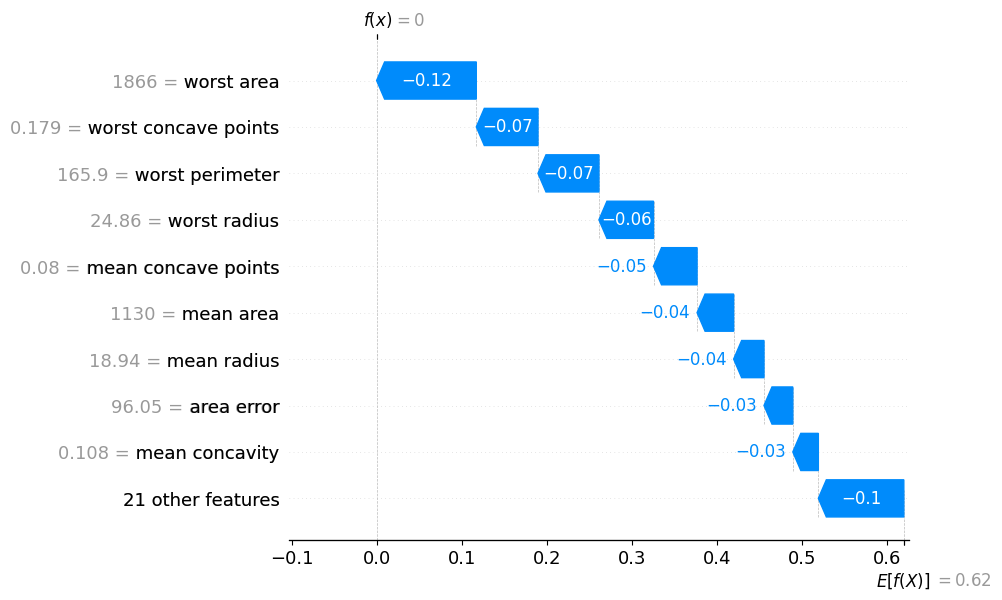

Ejemplo 2 - Clase real: 0


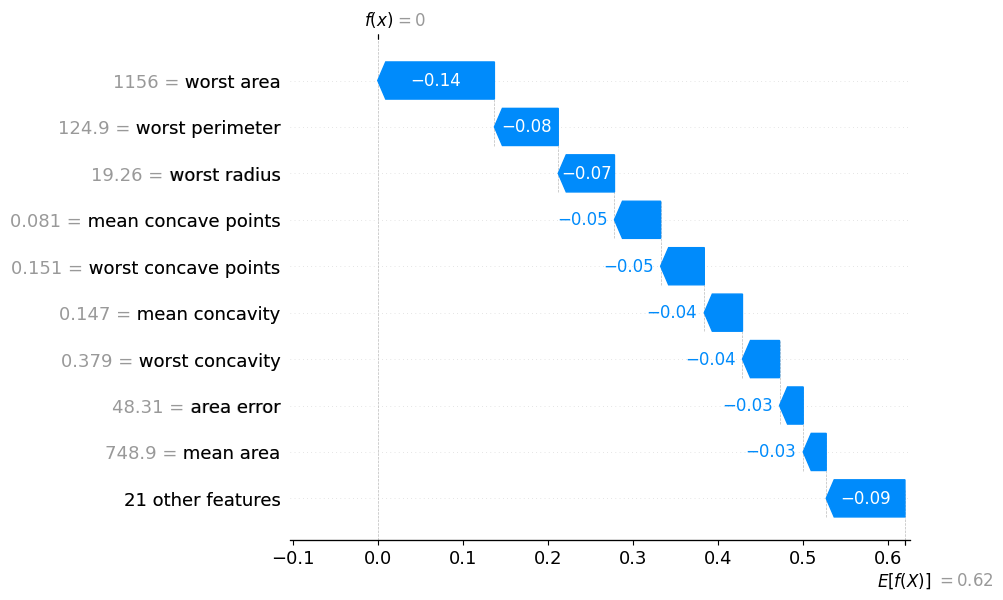

Ejemplo 3 - Clase real: 1


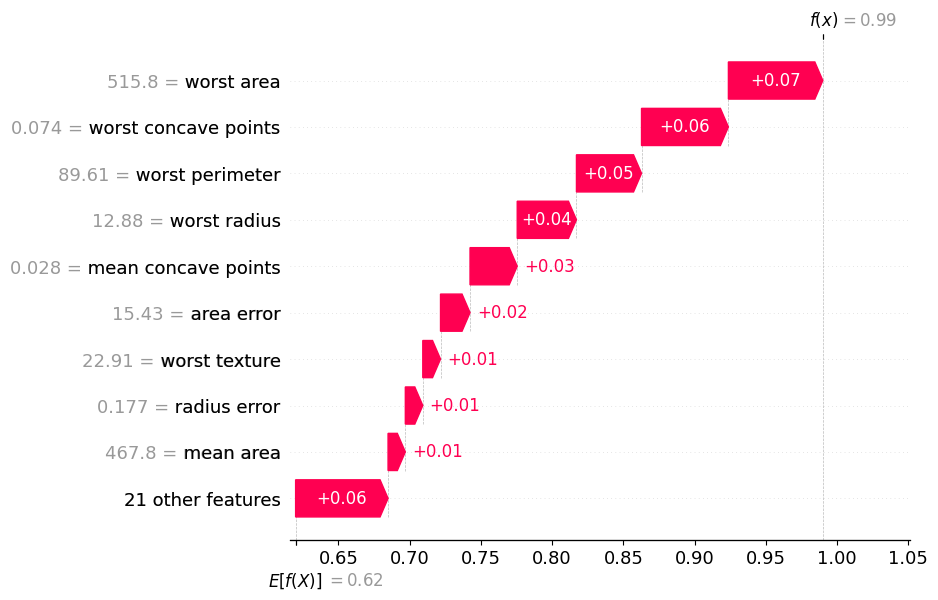

Ejemplo 4 - Clase real: 1


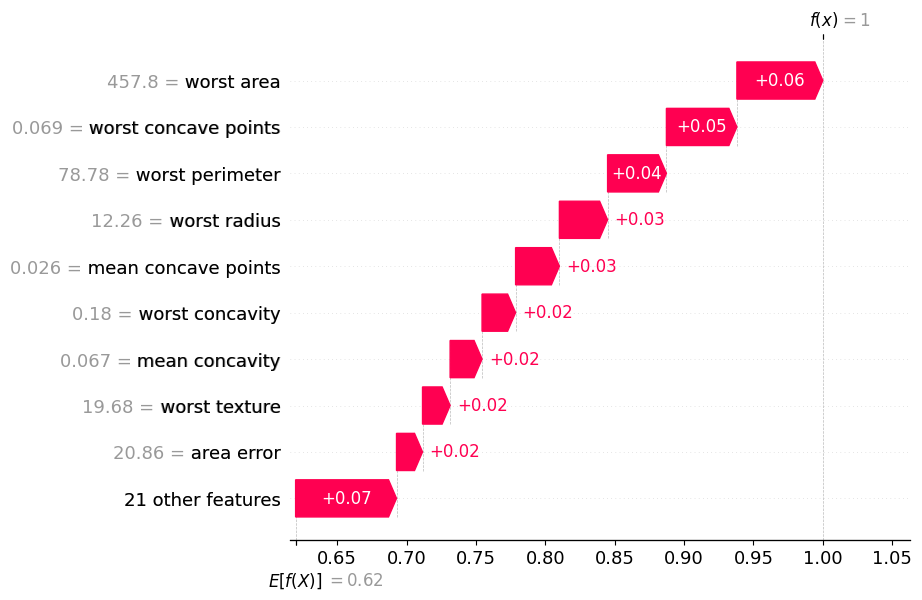

In [13]:
# shap_random_forest_example.ipynb

import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cargar los datos
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de scikit-learn
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Crear el explainer SHAP para modelos genéricos
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Elegimos la clase 1 (ej: "maligno")
shap_values_class1 = shap_values[:, :, 1]

# Gráficos
shap.plots.beeswarm(shap_values_class1)
shap.plots.bar(shap_values_class1)

# ----------- Interpretabilidad local (1 ejemplo) -----------

# Seleccionar un caso puntual
i = 0
# Interpretabilidad local para varios ejemplos
for i in range(5):  # Cambia 5 por la cantidad de ejemplos que quieras ver
    print(f"Ejemplo {i} - Clase real: {y_test[i]}")
    shap.plots.waterfall(shap_values_class1[i])


# 📊 SHAP Values Explained

https://medium.com/biased-algorithms/shap-values-explained-08764ab16466

**Autor**: Amit Yadav  
**Fuente**: Medium - Biased Algorithms

## ✨ ¿Qué son los SHAP Values?

Los **SHAP (SHapley Additive exPlanations)** son una técnica de interpretación de modelos de aprendizaje automático basada en la teoría de juegos de Shapley. Asignan a cada característica una contribución proporcional a la predicción de un modelo.

## 🔍 Fundamento teórico

- Inspirados en los valores de **Shapley** de la teoría de juegos cooperativos.
- Evalúan la **contribución marginal promedio** de cada feature en todas las posibles combinaciones.
- Garantizan **equidad y consistencia** en la atribución de importancia a cada variable.

## 🧠 ¿Por qué son útiles?

- Ofrecen **interpretabilidad local** y **global** en modelos complejos (como Random Forests o XGBoost).
- Son **modelo-agnósticos** y compatibles con modelos de caja negra.
- Permiten **entender decisiones individuales**, lo cual es crucial en contextos sensibles (ej: finanzas, salud).

## ⚙️ Cómo funcionan

1. Se calcula la predicción base (valor esperado del modelo).
2. Para cada instancia, se computa el impacto de cada feature como diferencia entre:
   - La predicción con esa feature incluida.
   - La predicción con esa feature excluida.
3. El valor SHAP de cada feature es el promedio de esas diferencias sobre todas las combinaciones posibles.

## 📉 Visualizaciones comunes

- **Summary Plot**: muestra el impacto de cada variable en muchas instancias.
- **Force Plot**: explica una predicción específica visualmente.
- **Dependence Plot**: analiza la interacción entre características.

## ⚠️ Limitaciones

- El cálculo exacto es **computacionalmente costoso** en modelos con muchas variables.
- Las aproximaciones (como en TreeSHAP) permiten uso práctico, pero pueden introducir **errores pequeños**.

## 🧪 Conclusión

SHAP es una herramienta poderosa para explicar predicciones de modelos complejos de forma transparente y equitativa. Su base en la teoría de juegos ofrece garantías formales que otras técnicas no tienen.
